---

In [1]:
from pathlib import Path

path = Path().absolute()

In [2]:
cd ../

c:\Users\c10nGp4\OneDrive\Documents\GitHub\imbalance-multi-classification


In [3]:
import pickle
import time

---

### Instantiate Classifier
---

In [4]:
from pipeline.classification import Classification
clf = Classification()

2023-06-12 07:30:59 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-06-12 07:30:59 INFO: DOWNLOAD STANZA MODEL
2023-06-12 07:30:59 INFO: LOAD STANZA PIPELINE: tokenize,mwt,pos,lemma


2023-06-12 07:30:59 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |

2023-06-12 07:30:59 INFO: Using device: cuda
2023-06-12 07:30:59 INFO: Loading: tokenize
2023-06-12 07:31:01 INFO: Loading: mwt
2023-06-12 07:31:01 INFO: Loading: pos
2023-06-12 07:31:01 INFO: Loading: lemma
2023-06-12 07:31:01 INFO: Done loading processors!


### Load Data
---

In [5]:
import pandas as pd

# Load dataset
testing_set_df = pd.read_csv(path / "assets/datasets/testing-set-1.csv", delimiter=";")

# Get X and y from dataset
X_test = list(testing_set_df["texts"])
y_test = list(testing_set_df["targets"])

### Load model
---

In [6]:
filepath = path / "assets/models/model.2023.06.10.14.19.44.007537.pickle"
clf.from_disk(filepath)

### Data Preparation
---

In [7]:
# Text Preprocessing
X_processed = clf.text_preprocessing_pipeline.transform(X_test)

# # Feature Selection
X_processed = clf.feature_selection_pipeline.transform(X_processed)

2023-06-12 07:31:02 INFO: TEXT CLEANING
2023-06-12 07:31:02 INFO: TOKENIZE, MWT, POS, LEMMA
2023-06-12 07:31:39 INFO: POS REMOVAL
2023-06-12 07:31:39 INFO: DOCUMENT TRANSFORMER


### Test model
---

In [8]:
y_pred = clf.test_preprocessed(X_processed)

2023-06-12 07:31:39 INFO: MODEL TESTINIG


### Evaluation
---

In [9]:
accuracy, mcc = clf.score(y_test, y_pred)

print("Accuracy:", accuracy)
print("MCC:", mcc)

Accuracy: 0.7884778311211522
MCC: 0.7259076198266605


### Confusion Matrix
---

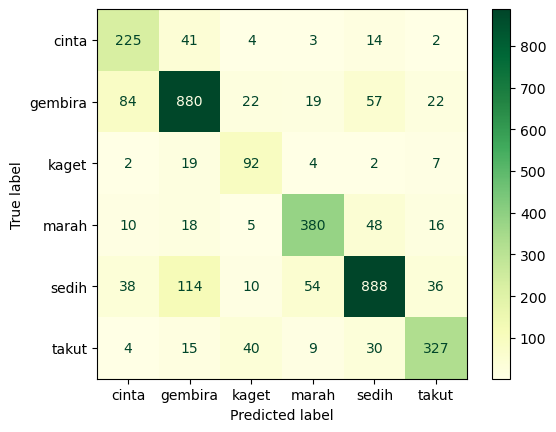

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

normalize = None
# normalize="true"

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize=normalize, cmap="YlGn")

## Analysis
---

In [11]:
loss = []

for i, pred in enumerate(y_pred):
    if pred != y_test[i]:
        loss.append((y_test[i], pred, X_test[i], X_processed[i]))

In [14]:
for target, pred, text, feature in loss:
    print((target, pred, text, feature))

('marah', 'sedih', 'Saya benar-benar dapat menyimpan dendam untuk waktu yang lama terhadap orang-orang yang saya rasa telah bersalah atau menyakiti saya entah mereka menyadarinya atau tidak', ['benar', 'benar', 'menyimpan', 'dendam', 'waktu', 'lama', 'orang', 'orang', 'rasa', 'bersalah', 'menyakiti', 'entah', 'menyadari', 'tidak'])
('gembira', 'takut', 'saya agak takut kue itu yang membuat saya merasa tidak begitu fantastis', ['agak', 'takut', 'kue', 'membuat', 'merasa', 'tidak', 'begitu', 'fantastis'])
('cinta', 'gembira', 'Saya merasa bersemangat tentang bisnis lokal akhir-akhir ini dan saya suka berjalan melalui toko konsinyasi dan toko barang bekas sama seperti saya menikmati niat baik', ['merasa', 'bersemangat', 'bisnis', 'lokal', 'akhir', 'akhir', 'suka', 'berjalan', 'toko', 'konsinyasi', 'toko', 'barang', 'bekas', 'sama', 'menikmati', 'niat', 'baik'])
('gembira', 'cinta', 'saya menyuarakan rasa sakit dan sakit hati saya tentang bagaimana saya merasa seperti orang luar kepada ora